## Load dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_digits

In [3]:
dir(load_digits())

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

## Load the data to the respective objects X,y

In [4]:
dataset = load_digits()
X = pd.DataFrame(dataset.data)
X.columns = dataset.feature_names
y= dataset.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,stratify=y)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
# default n_neighbors=5

## Fit the model and predict the test values

In [7]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [8]:
y_pred = model.predict(X_test)

In [9]:
model.score(X_test,y_test)

0.9888888888888889

In [10]:
y_pred = model.predict(X_test)
y_true = y_test

## Model Evaluation

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
cm = confusion_matrix(y_true,y_pred)

<AxesSubplot:>

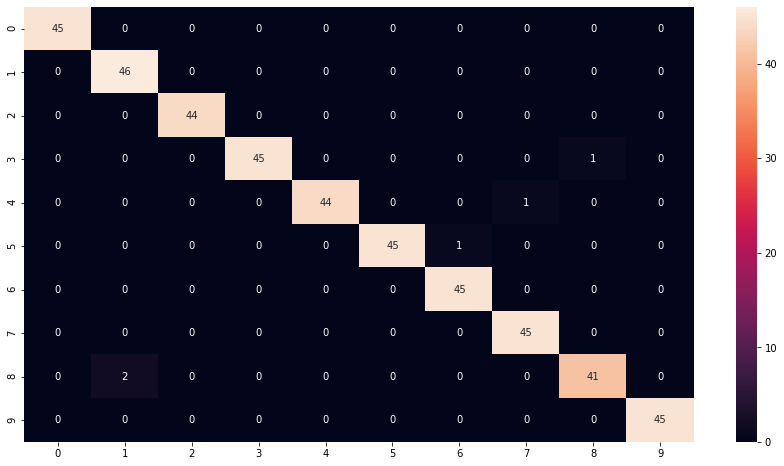

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True)

print the classification report

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      1.00      0.98        46
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        46
           4       1.00      0.98      0.99        45
           5       1.00      0.98      0.99        46
           6       0.98      1.00      0.99        45
           7       0.98      1.00      0.99        45
           8       0.98      0.95      0.96        43
           9       1.00      1.00      1.00        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2,3,4,5,6,7]})

In [18]:
gs.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]})

In [19]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004886,0.002641,0.020821,0.006038,2,{'n_neighbors': 2},0.961111,0.966667,0.969359,0.977716,0.961003,0.967171,0.006181,1
1,0.002942,0.000051,0.017233,0.000237,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,2
2,0.002948,0.000030,0.020762,0.000249,4,{'n_neighbors': 4},0.947222,0.958333,0.966574,0.980501,0.966574,0.963841,0.010946,3
3,0.002975,0.000048,0.021089,0.000222,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,4
4,0.002946,0.000020,0.020993,0.000261,6,{'n_neighbors': 6},0.944444,0.958333,0.966574,0.974930,0.952646,0.959386,0.010612,6
5,0.002957,0.000012,0.020954,0.000315,7,{'n_neighbors': 7},0.936111,0.961111,0.969359,0.980501,0.952646,0.959946,0.015059,5


In [20]:
# We usually need only the params & mean_test_score  
results[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.967171,1
1,{'n_neighbors': 3},0.966622,2
2,{'n_neighbors': 4},0.963841,3
3,{'n_neighbors': 5},0.962728,4
4,{'n_neighbors': 6},0.959386,6
5,{'n_neighbors': 7},0.959946,5


## The mean_test_score is almost same for the top 4 values. So, it doesn't really matter to retain the model with the best n_neighbour value for this case.
But, just to formality I'll go ahead and show how it's generally done

Now, Fit the model with n_neighbors=2

In [21]:
model = KNeighborsClassifier(n_neighbors=2)

In [22]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [23]:
y_pred = model.predict(X_test)

In [24]:
model.score(X_test,y_test)

0.9866666666666667

In [25]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.94      1.00      0.97        46
           2       1.00      1.00      1.00        44
           3       0.96      1.00      0.98        46
           4       1.00      1.00      1.00        45
           5       1.00      0.98      0.99        46
           6       0.98      1.00      0.99        45
           7       1.00      1.00      1.00        45
           8       1.00      0.93      0.96        43
           9       1.00      0.96      0.98        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



For this problem, the scores and reports where quite similar for '2' and '5' values of n_neighbours 